# Visualize the overlap in the DR6, DR7 sweeps

In [1]:
import os, pdb
from glob import glob
import numpy as np
import fitsio
from astropy.table import Table
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
dr6dir = '/project/projectdirs/cosmo/data/legacysurvey/dr6/sweep/6.0'
dr7dir = '/global/projecta/projectdirs/cosmo/data/legacysurvey/dr7/sweep/7.1'
dr6files = glob('{}/*.fits'.format(dr6dir))
dr7files = glob('{}/*.fits'.format(dr7dir))

In [4]:
dr6cat = np.array([os.path.basename(dd) for dd in dr6files])
dr7cat = np.array([os.path.basename(dd) for dd in dr7files])

In [5]:
drcat = np.intersect1d(dr6cat, dr7cat)
print(drcat)
print(len(dr6cat), len(dr7cat), len(drcat))

['sweep-000m005-010p000.fits' 'sweep-000p000-010p005.fits'
 'sweep-010m005-020p000.fits' 'sweep-010p000-020p005.fits'
 'sweep-010p025-020p030.fits' 'sweep-020p025-030p030.fits'
 'sweep-020p030-030p035.fits' 'sweep-030m005-040p000.fits'
 'sweep-030m010-040m005.fits' 'sweep-030p000-040p005.fits'
 'sweep-030p025-040p030.fits' 'sweep-040m005-050p000.fits'
 'sweep-040p000-050p005.fits' 'sweep-040p010-050p015.fits'
 'sweep-060m010-070m005.fits' 'sweep-100p025-110p030.fits'
 'sweep-100p030-110p035.fits' 'sweep-100p035-110p040.fits'
 'sweep-110p025-120p030.fits' 'sweep-110p030-120p035.fits'
 'sweep-120p015-130p020.fits' 'sweep-120p020-130p025.fits'
 'sweep-120p025-130p030.fits' 'sweep-120p030-130p035.fits'
 'sweep-130p025-140p030.fits' 'sweep-130p030-140p035.fits'
 'sweep-140m005-150p000.fits' 'sweep-140p000-150p005.fits'
 'sweep-140p025-150p030.fits' 'sweep-140p030-150p035.fits'
 'sweep-150p000-160p005.fits' 'sweep-150p025-160p030.fits'
 'sweep-150p030-160p035.fits' 'sweep-160p025-170p030.fit

In [6]:
decmin, decmax = [], []
for sweepfile in drcat:
    dmin, dmax = np.float(sweepfile[10:13]), np.float(sweepfile[18:21])
    if sweepfile[9] == 'm':
        dmin *= -1
    if sweepfile[17] == 'm':
        dmax *= -1
    decmin.append(dmin)
    decmax.append(dmax)
    print(sweepfile, dmin, dmax)
decmin = np.array(decmin)
decmax = np.array(decmax)

sweep-000m005-010p000.fits -5.0 0.0
sweep-000p000-010p005.fits 0.0 5.0
sweep-010m005-020p000.fits -5.0 0.0
sweep-010p000-020p005.fits 0.0 5.0
sweep-010p025-020p030.fits 25.0 30.0
sweep-020p025-030p030.fits 25.0 30.0
sweep-020p030-030p035.fits 30.0 35.0
sweep-030m005-040p000.fits -5.0 0.0
sweep-030m010-040m005.fits -10.0 -5.0
sweep-030p000-040p005.fits 0.0 5.0
sweep-030p025-040p030.fits 25.0 30.0
sweep-040m005-050p000.fits -5.0 0.0
sweep-040p000-050p005.fits 0.0 5.0
sweep-040p010-050p015.fits 10.0 15.0
sweep-060m010-070m005.fits -10.0 -5.0
sweep-100p025-110p030.fits 25.0 30.0
sweep-100p030-110p035.fits 30.0 35.0
sweep-100p035-110p040.fits 35.0 40.0
sweep-110p025-120p030.fits 25.0 30.0
sweep-110p030-120p035.fits 30.0 35.0
sweep-120p015-130p020.fits 15.0 20.0
sweep-120p020-130p025.fits 20.0 25.0
sweep-120p025-130p030.fits 25.0 30.0
sweep-120p030-130p035.fits 30.0 35.0
sweep-130p025-140p030.fits 25.0 30.0
sweep-130p030-140p035.fits 30.0 35.0
sweep-140m005-150p000.fits -5.0 0.0
sweep-140p00

In [7]:
def qa(sweepfiles):
    for sweepfile in sweepfiles:
        dr6 = Table(fitsio.read('{}/{}'.format(dr6dir, sweepfile), columns=['RA', 'DEC']))
        dr7 = Table(fitsio.read('{}/{}'.format(dr7dir, sweepfile), columns=['RA', 'DEC']))
        rmin = np.min((dr6['RA'].min(), dr7['RA'].min()))
        rmax = np.max((dr6['RA'].max(), dr7['RA'].max()))
        dmin = np.min((dr6['DEC'].min(), dr7['DEC'].min()))
        dmax = np.max((dr6['DEC'].max(), dr7['DEC'].max()))
    
        fig, ax = plt.subplots(1, 2)
        ax[0].hexbin(dr6['RA'], dr6['DEC'], mincnt=1)
        ax[1].hexbin(dr7['RA'], dr7['DEC'], mincnt=1)
        ax[0].set_title('DR6')
        ax[1].set_title('DR7')
        for xx in ax:
            xx.set_xlim(rmin, rmax)
            xx.set_ylim(dmin, dmax)
        fig.suptitle(sweepfile)

22


/global/common/software/desi/cori/desiconda/20180512-1.2.5-img/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


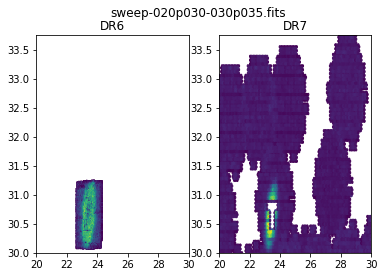

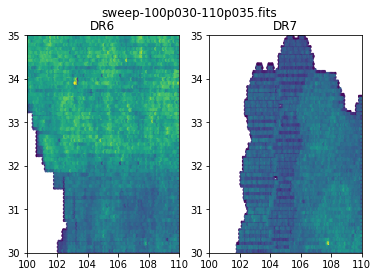

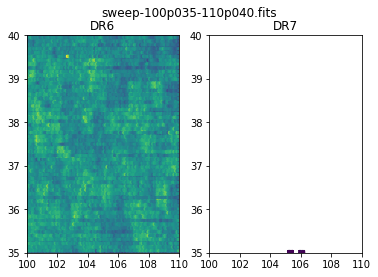

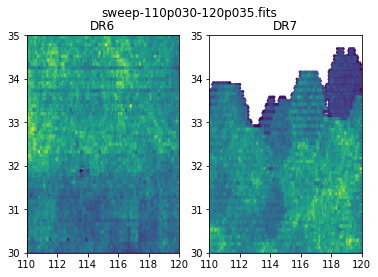

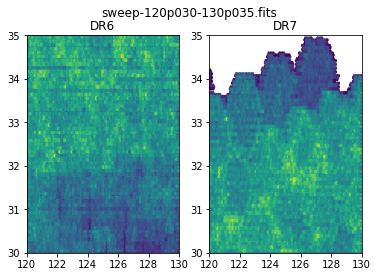

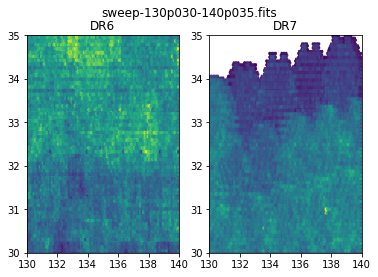

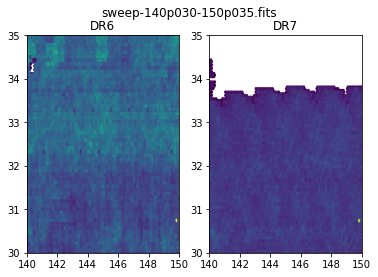

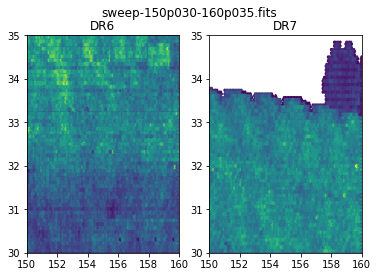

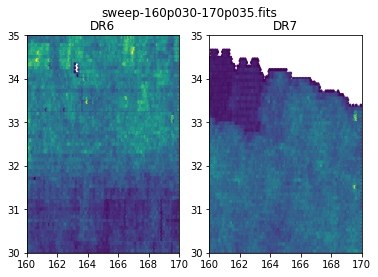

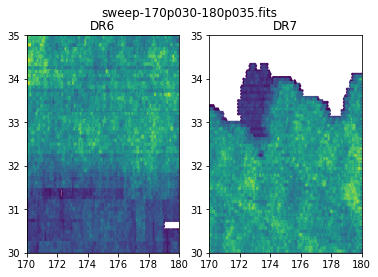

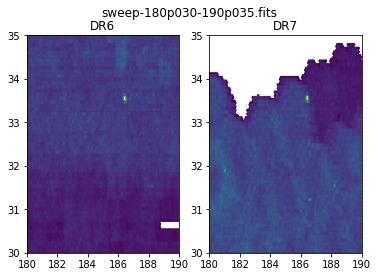

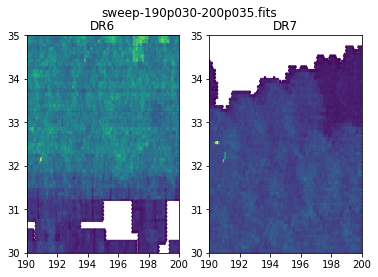

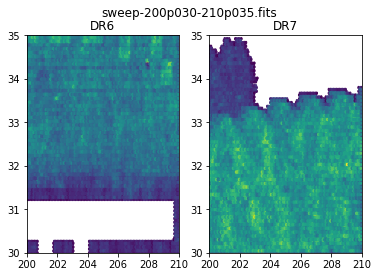

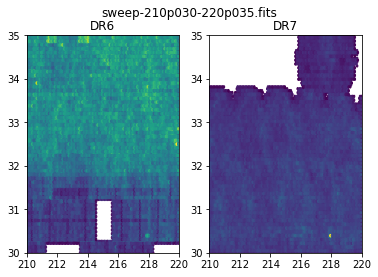

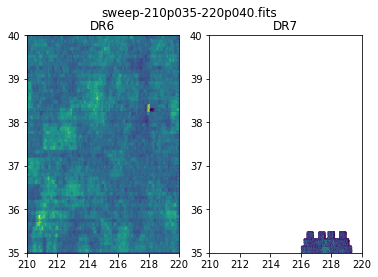

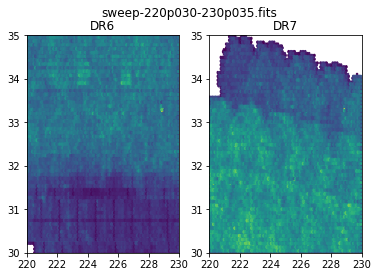

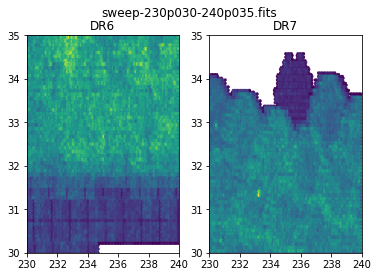

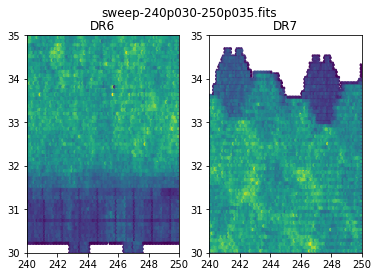

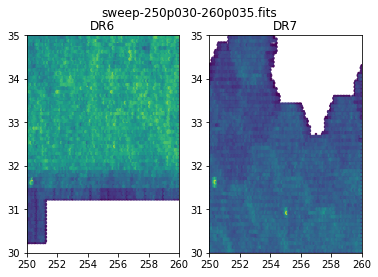

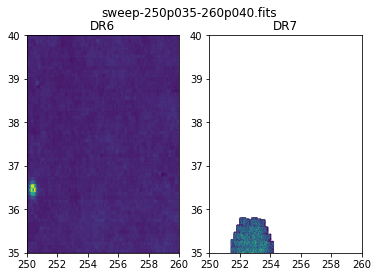

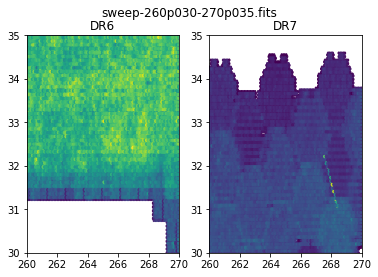

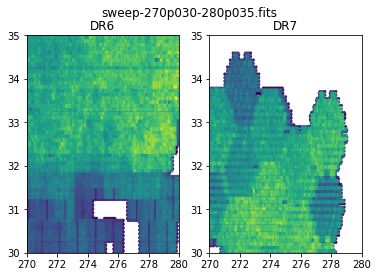

In [8]:
these = decmin >= 30
print(np.sum(these))
qa(drcat[these])

25


/global/common/software/desi/cori/desiconda/20180512-1.2.5-img/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


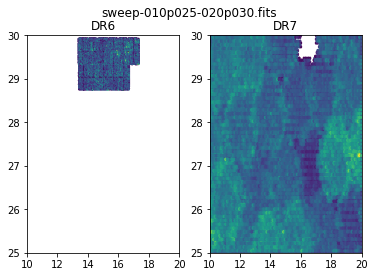

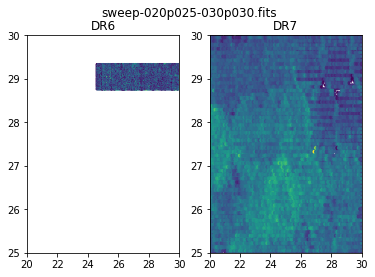

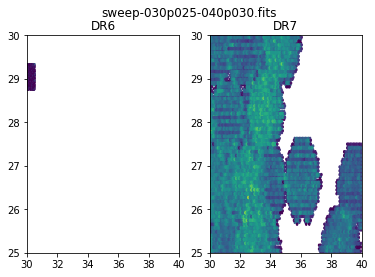

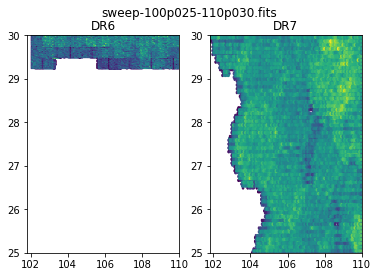

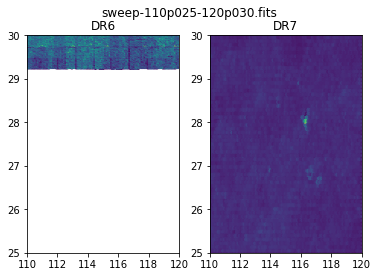

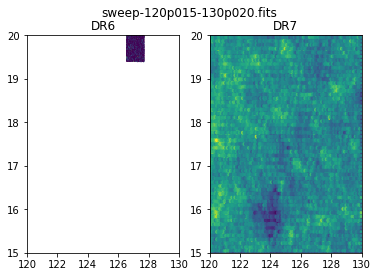

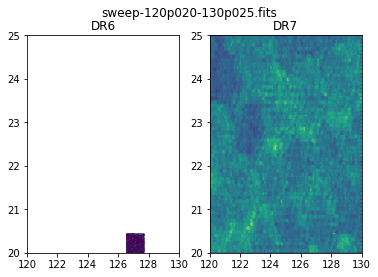

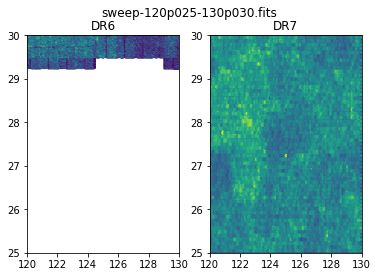

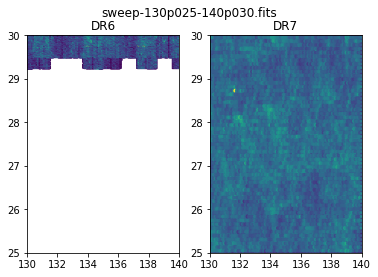

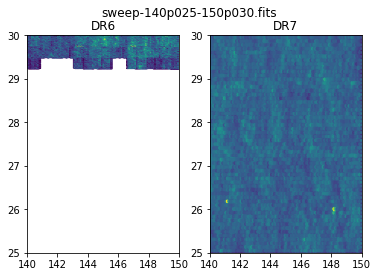

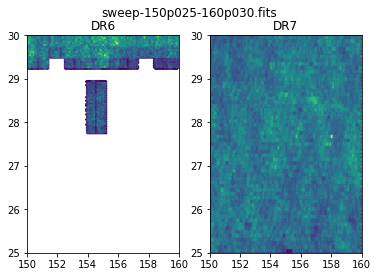

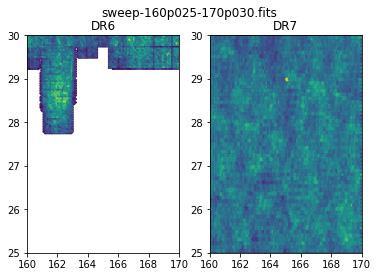

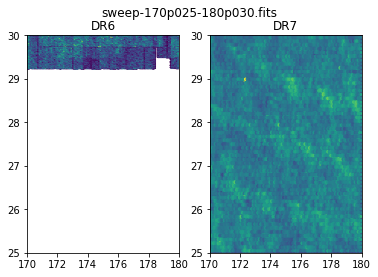

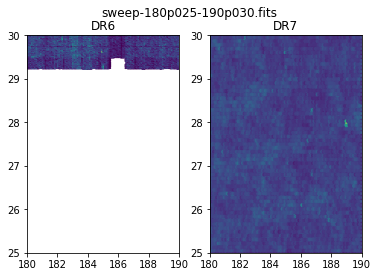

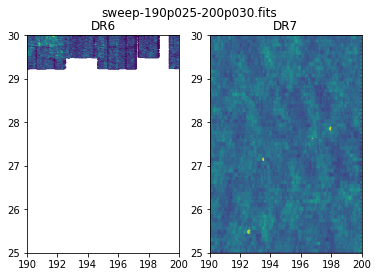

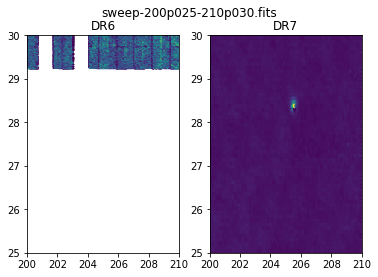

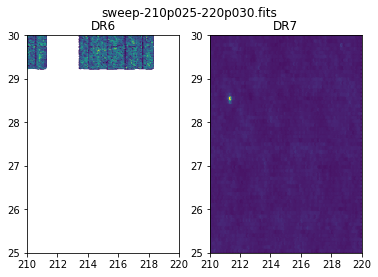

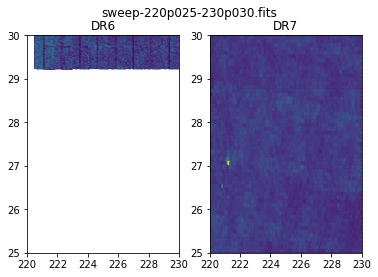

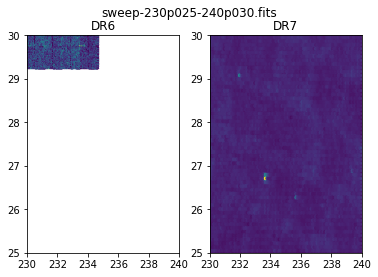

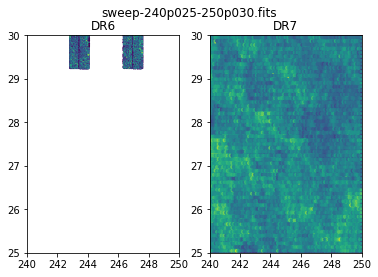

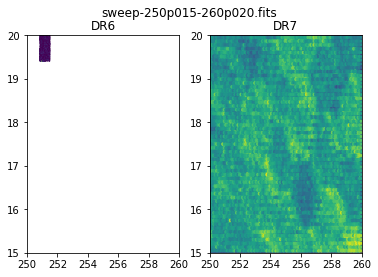

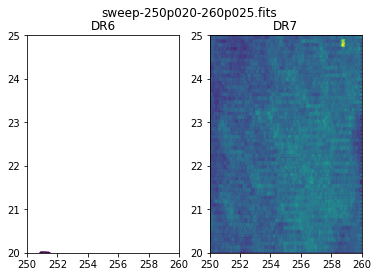

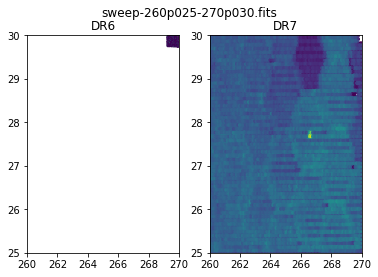

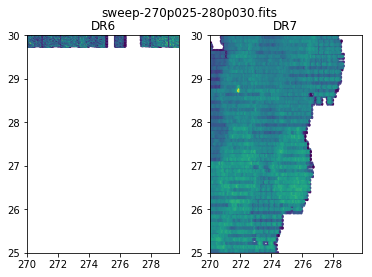

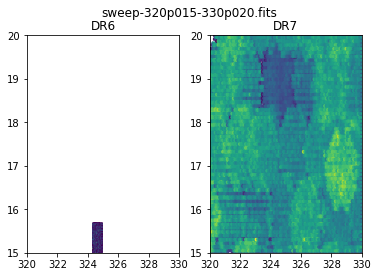

In [9]:
these = (decmin < 30) * (decmin >= 15)
print(np.sum(these))
qa(drcat[these])

16


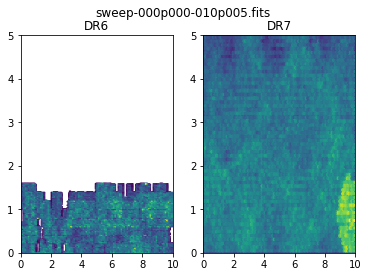

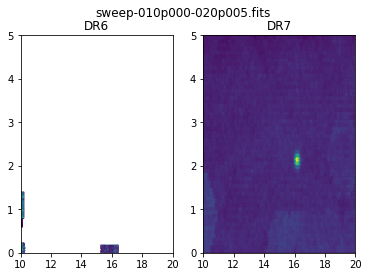

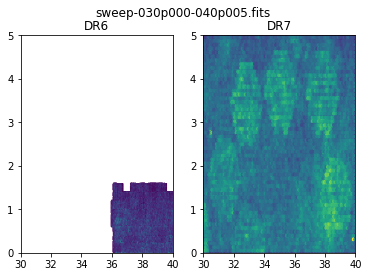

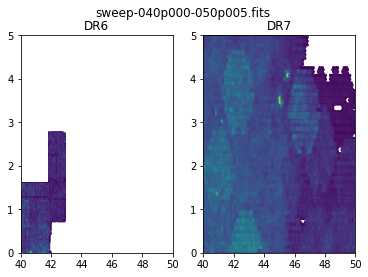

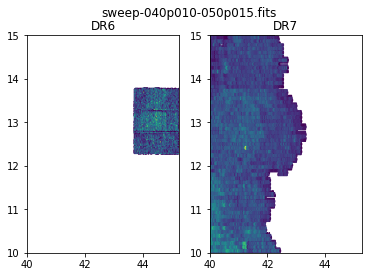

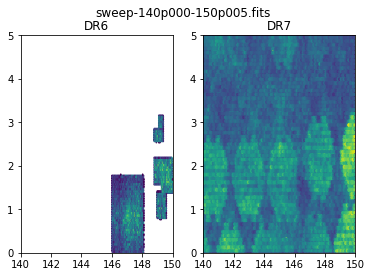

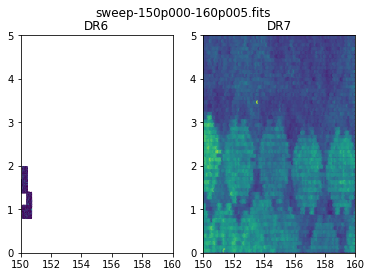

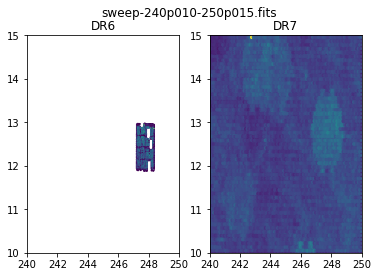

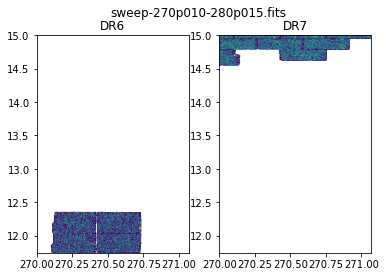

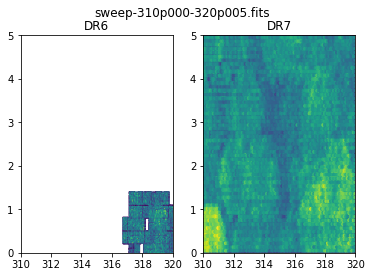

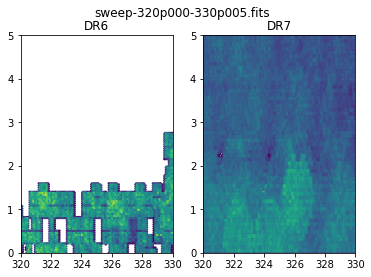

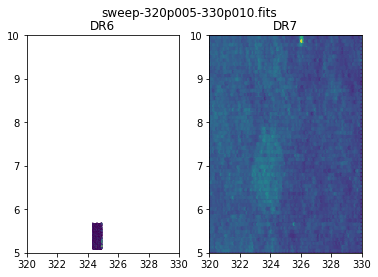

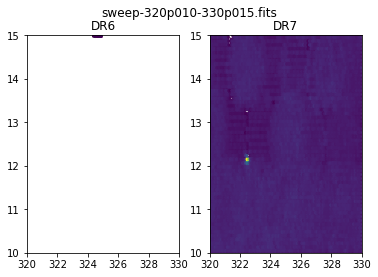

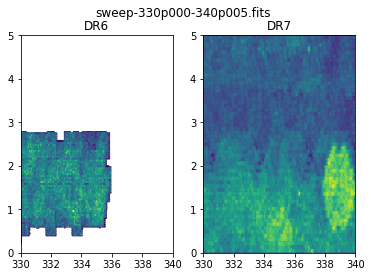

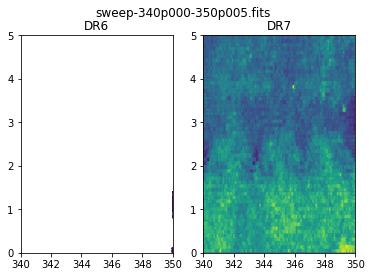

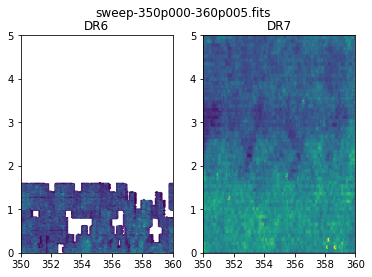

In [10]:
these = (decmin < 15) * (decmin >= 0)
print(np.sum(these))
qa(drcat[these])

13


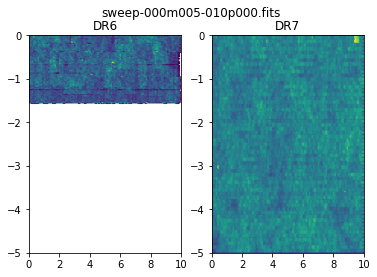

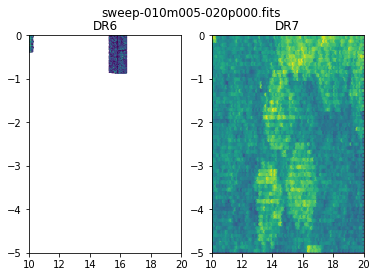

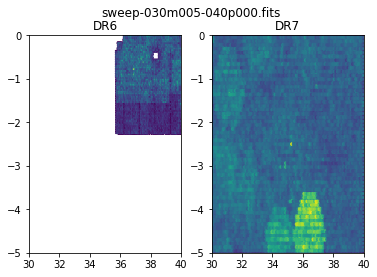

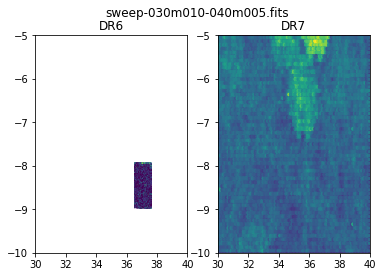

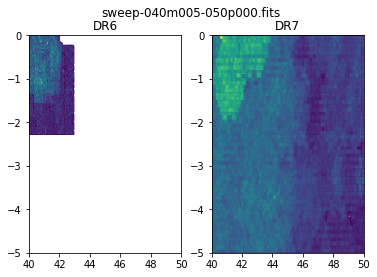

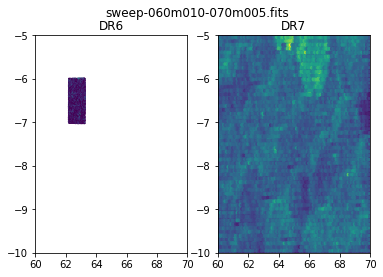

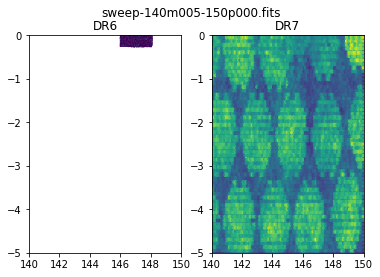

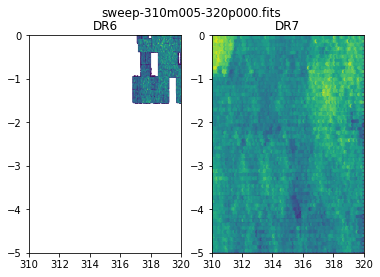

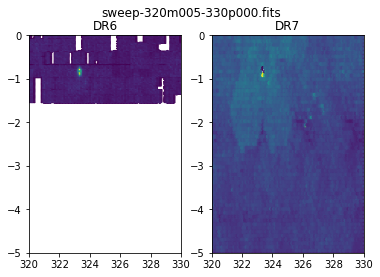

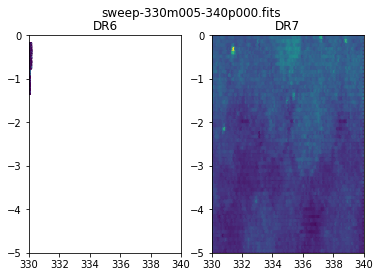

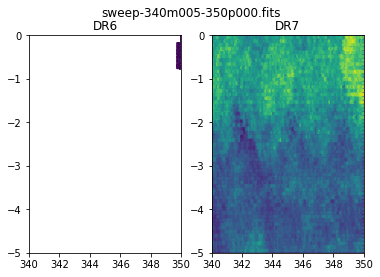

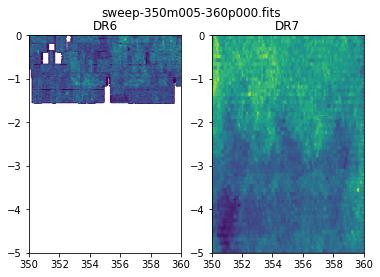

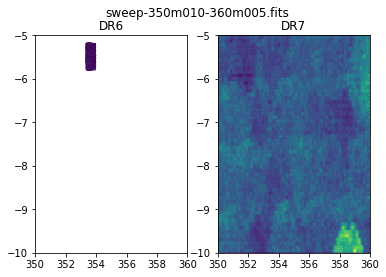

In [11]:
these = decmin < 0
print(np.sum(these))
qa(drcat[these])